In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

#### Data Path

In [2]:
train_data_path = Path("C:/Users/Franks/Desktop/APPLIED AI 3_4_2023\Training")

In [3]:
test_data_path = Path("C:/Users/Franks/Desktop/APPLIED AI 3_4_2023\Testing")

#### Image Path

In [4]:
train_img_path = list(train_data_path.glob(r"*/*.jpg"))

In [5]:
test_img_path = list(test_data_path.glob(r"*/*.jpg"))

#### visualising Image

In [6]:
print(train_img_path[0:10])

[WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (1).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (10).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (100).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (101).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (102).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (103).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (104).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (105).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (106).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (107).jpg')]


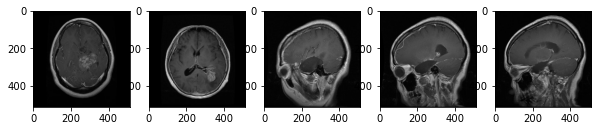

In [7]:
# load and display the first 5 images of our training data
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes):
    img = plt.imread(str(train_img_path[i]))
    ax.imshow(img)
plt.show()

In [8]:
print(test_img_path[0:10])

[WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(1).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(10).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(100).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(11).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(12).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(13).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(14).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(15).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(16).jpg'), WindowsPath('C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing/glioma_tumor/image(17).jpg')]


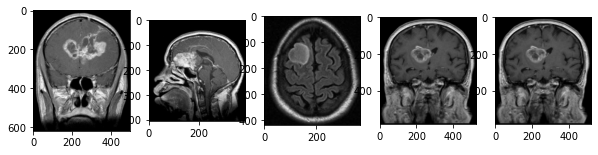

In [9]:
# load and display the first 5 images of our testing data
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes):
    img = plt.imread(str(test_img_path[i]))
    ax.imshow(img)
plt.show()

Printing image labels

In [10]:
# Using list comprehension to extract labels from file paths
train_img_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_img_path))

In [11]:
test_img_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_img_path))

In [12]:
# Printing the count of images for each label
print("NO: ",train_img_labels.count("no_tumor"))
print("Pituitary: ",train_img_labels.count("pituitary_tumor"))
print("Meningioma: ",train_img_labels.count("meningioma_tumor"))
print("Glioma: ",train_img_labels.count("glioma_tumor"))

NO:  395
Pituitary:  827
Meningioma:  822
Glioma:  826


In [13]:
print("NO: ",test_img_labels.count("no_tumor"))
print("Pituitary: ",test_img_labels.count("pituitary_tumor"))
print("Meningioma: ",test_img_labels.count("meningioma_tumor"))
print("Glioma: ",test_img_labels.count("glioma_tumor"))

NO:  105
Pituitary:  74
Meningioma:  115
Glioma:  100


In [14]:
# Creating Pandas DataFrames to hold our file paths and labels
train_img_path_series = pd.Series(train_img_path,name="JPG").astype(str)
train_img_labels_series = pd.Series(train_img_labels, name="TUMOR_CATEGORY")

In [15]:
test_img_path_series = pd.Series(test_img_path,name="JPG").astype(str)
test_img_labels_series = pd.Series(test_img_labels, name="TUMOR_CATEGORY")

In [16]:
print(train_img_path_series.head())
print("-----"*20)
print(train_img_labels_series.head())

0    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...
1    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...
2    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...
3    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...
4    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    glioma_tumor
1    glioma_tumor
2    glioma_tumor
3    glioma_tumor
4    glioma_tumor
Name: TUMOR_CATEGORY, dtype: object


In [17]:
print(test_img_path_series.head())
print("-----"*20)
print(test_img_labels_series.head())

0    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...
1    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...
2    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...
3    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...
4    C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    glioma_tumor
1    glioma_tumor
2    glioma_tumor
3    glioma_tumor
4    glioma_tumor
Name: TUMOR_CATEGORY, dtype: object


In [18]:
main_train_data = pd.concat([train_img_path_series,train_img_labels_series],axis=1)

In [19]:
main_test_data = pd.concat([test_img_path_series,test_img_labels_series],axis=1)

In [20]:
print(main_train_data.head())

                                                 JPG TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
1  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
2  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
3  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
4  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor


In [21]:
print(main_test_data.head())

                                                 JPG TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...   glioma_tumor
1  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...   glioma_tumor
2  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...   glioma_tumor
3  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...   glioma_tumor
4  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...   glioma_tumor


shuffling our data

In [22]:
main_train_data = main_train_data.sample(frac=1).reset_index(drop=True)
main_test_data = main_test_data.sample(frac=1).reset_index(drop=True)

In [23]:
print(main_train_data.head(10))
print("----"*20)
print(main_test_data.head(10))

                                                 JPG    TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...      glioma_tumor
1  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...          no_tumor
2  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...      glioma_tumor
3  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...      glioma_tumor
4  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...      glioma_tumor
5  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...          no_tumor
6  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...  meningioma_tumor
7  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   pituitary_tumor
8  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...  meningioma_tumor
9  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...          no_tumor
--------------------------------------------------------------------------------
                                                 JPG    TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...  meningioma_tu

view names

In [24]:
main_train_data["TUMOR_CATEGORY"]

0           glioma_tumor
1               no_tumor
2           glioma_tumor
3           glioma_tumor
4           glioma_tumor
              ...       
2865     pituitary_tumor
2866            no_tumor
2867        glioma_tumor
2868        glioma_tumor
2869    meningioma_tumor
Name: TUMOR_CATEGORY, Length: 2870, dtype: object

In [25]:
main_test_data["TUMOR_CATEGORY"]

0              no_tumor
1       pituitary_tumor
2          glioma_tumor
3          glioma_tumor
4       pituitary_tumor
             ...       
389        glioma_tumor
390    meningioma_tumor
391            no_tumor
392    meningioma_tumor
393            no_tumor
Name: TUMOR_CATEGORY, Length: 394, dtype: object

In [25]:
print(main_train_data.head())
print(main_test_data.head())

                                                 JPG TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
1  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...       no_tumor
2  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
3  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
4  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Tr...   glioma_tumor
                                                 JPG    TUMOR_CATEGORY
0  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...  meningioma_tumor
1  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...  meningioma_tumor
2  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...  meningioma_tumor
3  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...      glioma_tumor
4  C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Te...          no_tumor


Visualizing our images

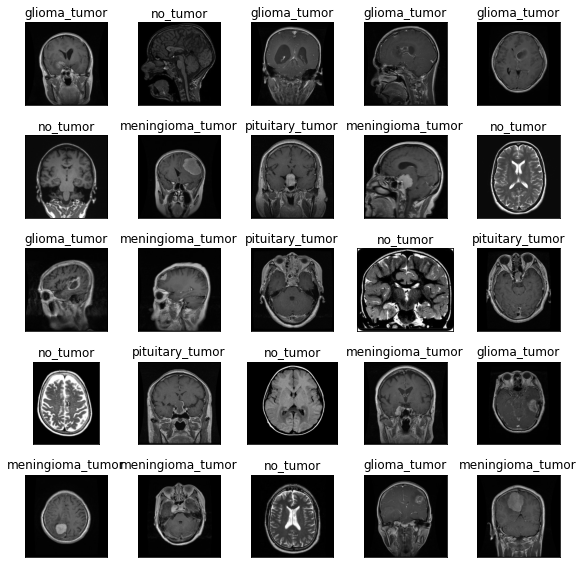

In [26]:
# visualize training image
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(main_train_data["JPG"][i]))
    ax.set_title(main_train_data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

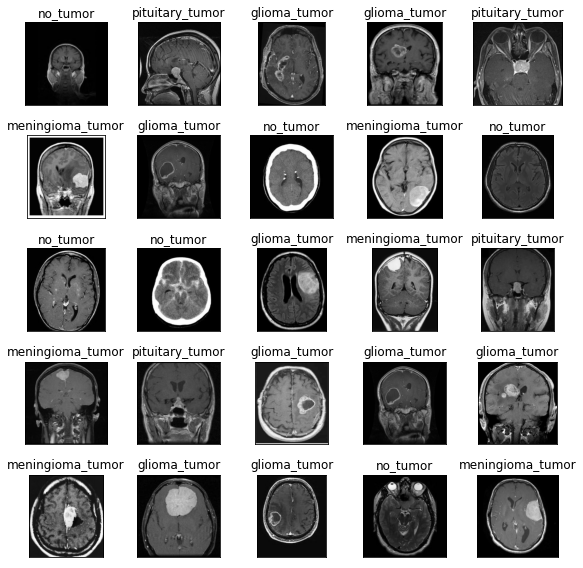

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(main_test_data["JPG"][i]))
    ax.set_title(main_test_data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

spliting our dataset

In [27]:
train_data,test_data = train_test_split(main_train_data,train_size=0.9,random_state=42)

In [28]:
print(train_data.shape)

(2583, 2)


In [29]:
print(test_data.shape)

(287, 2)


#### Image Preprocessing

In [31]:
# For preprocessing, the ImageDataGenerator library is imported and used for Data Augmentation
from keras.preprocessing.image import ImageDataGenerator 

In [32]:
Generator = ImageDataGenerator(rescale=1./255,
                               brightness_range=[0.2,0.9],
                               featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0, validation_split=0.1)

In [33]:
trainset = Generator.flow_from_dataframe(dataframe=train_data,
                                         x_col="JPG",
                                         y_col="TUMOR_CATEGORY",
                                         seed=42,
                                         input_size=(256,256),
                                         color_mode="rgb",
                                         class_mode="categorical",
                                          batch_size=10,
                                         subset="training"
                                         )

Found 2325 validated image filenames belonging to 4 classes.


In [34]:
validateset = Generator.flow_from_dataframe(dataframe=train_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                              input_size=(256,256),
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10,
                                               subset="validation"
                                              )

Found 258 validated image filenames belonging to 4 classes.


In [35]:
testset = Generator.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                              input_size=(256,256),
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10
                                              )

Found 287 validated image filenames belonging to 4 classes.


In [37]:
print(trainset.class_indices)
print(trainset.classes[0:5])
print(trainset.image_shape)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
[1, 3, 1, 3, 1]
(256, 256, 3)


#### TRANSFER LEARNING


Using Transfer learning to import Custom pretrained models for performance comparism with our custom model for any improvement

#### VGG16 Pretrained Model

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

#### Constuctor Stage

In [39]:
# load pre-trained VGG16 model without the top layer
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [40]:
# write a function to go through all layers of VGG16 and disable the weights from getting updated during our training
# Freeze the pre-trained layers to disable weights update and retain the extraction layer

for layer in vgg16.layers:
    layer.trainable = False

In [41]:
# we then flaten and add our output Dense layers on top of the pre-trained layers to customise the model to our task

x = layers.Flatten()(vgg16.output)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dense(4, activation = 'softmax')(x)  

#### Compilation stage

In [42]:
# compile model with input and output
vgg16_model = models.Model(inputs=vgg16.input, outputs=x)

In [43]:
# Compile the model with the chosen optimizer, loss function and evaluation metric
vgg16_model.compile(optimizer=RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#### Training Stage

In [45]:
# fit the model on our dataset and Train the model on the training data and validate on the validation data
vgg16_hist = vgg16_model.fit(trainset, epochs=10, validation_data=validateset)

Epoch 1/10
233/233 [==============================] - 937s 4s/step - loss: 2.1930 - accuracy: 0.5531 - val_loss: 0.8047 - val_accuracy: 0.6744
Epoch 2/10
233/233 [==============================] - 950s 4s/step - loss: 0.9226 - accuracy: 0.6723 - val_loss: 0.6322 - val_accuracy: 0.7829
Epoch 3/10
233/233 [==============================] - 964s 4s/step - loss: 0.6023 - accuracy: 0.7600 - val_loss: 0.4550 - val_accuracy: 0.8295
Epoch 4/10
233/233 [==============================] - 978s 4s/step - loss: 0.4817 - accuracy: 0.8120 - val_loss: 0.7935 - val_accuracy: 0.7209
Epoch 5/10
233/233 [==============================] - 1036s 4s/step - loss: 0.4318 - accuracy: 0.8327 - val_loss: 0.4963 - val_accuracy: 0.8295
Epoch 6/10
233/233 [==============================] - 995s 4s/step - loss: 0.3644 - accuracy: 0.8572 - val_loss: 0.5144 - val_accuracy: 0.8217
Epoch 7/10
233/233 [==============================] - 970s 4s/step - loss: 0.3124 - accuracy: 0.8770 - val_loss: 0.4080 - val_accuracy: 0.845

Evaluation Stage

In [77]:
# confusion matrix takes both actual value and predicted value
cm = confusion_matrix(testset.classes, y_pred)

In [78]:
cm

array([[19, 30, 11, 15],
       [17, 32, 11, 20],
       [11, 23,  2,  9],
       [14, 46,  4, 23]], dtype=int64)

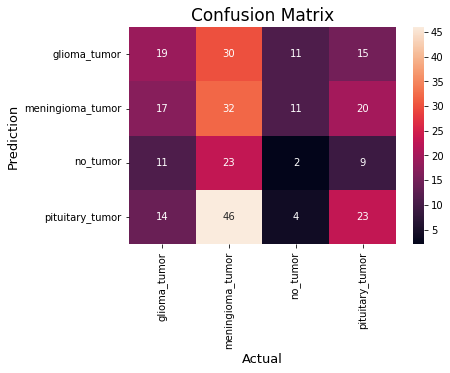

In [79]:
# Plotting the confusion matrix trend
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'],
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [82]:
# print(classification_report(y_test_new,pred))
print(classification_report(testset.classes, y_pred, target_names = ['glioma_tumor', 'meningioma_tumor','no_tumor', 'pituitary_tumor' ]))

                  precision    recall  f1-score   support

    glioma_tumor       0.31      0.25      0.28        75
meningioma_tumor       0.24      0.40      0.30        80
        no_tumor       0.07      0.04      0.05        45
 pituitary_tumor       0.34      0.26      0.30        87

        accuracy                           0.26       287
       macro avg       0.24      0.24      0.23       287
    weighted avg       0.26      0.26      0.26       287

